In [436]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit import transpile
from qiskit.visualization import plot_bloch_multivector, plot_state_city
from qiskit.quantum_info import Statevector
import numpy as np
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Operator

# Pauli X-Gate

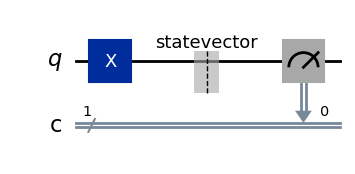

In [437]:
qc = QuantumCircuit(1,1)
qc.x(0)
qc.save_statevector()
qc.measure(0,0)
qc.draw('mpl')

In [438]:
backend = Aer.get_backend('aer_simulator')

#transpile and run
compiled = transpile(qc,backend)
result = backend.run(compiled,shots=1024).result()

#get classical counts
counts = result.get_counts()
print(counts)

{'1': 1024}


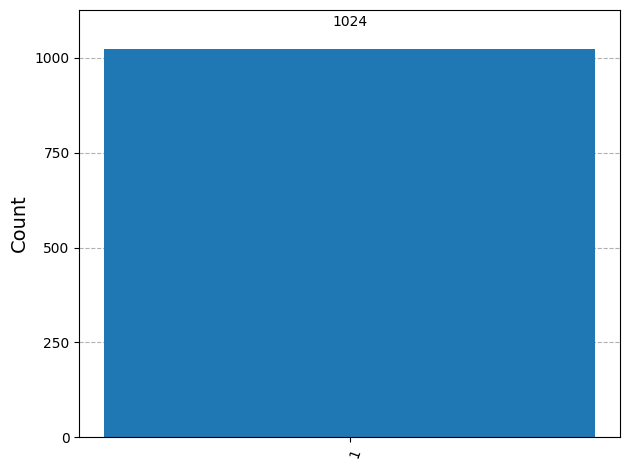

In [439]:
plot_histogram(counts)

In [440]:
backend = Aer.get_backend('aer_simulator')
result = backend.run(qc).result()
print("Statevector:", result.get_statevector())


Statevector: Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


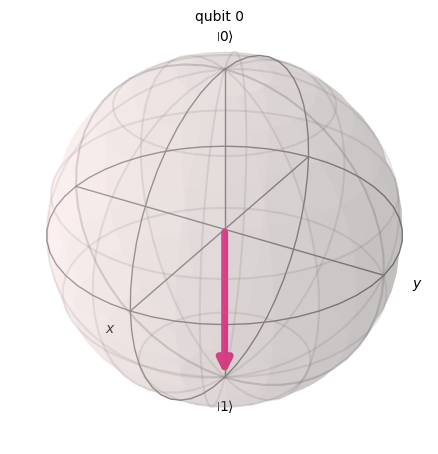

In [441]:
plot_bloch_multivector(result.get_statevector())

In [442]:
qc = QuantumCircuit(1)
qc.x(0)
print("X matrix:\n", Operator(qc).data)

X matrix:
 [[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]


# Pauli Y-Gate

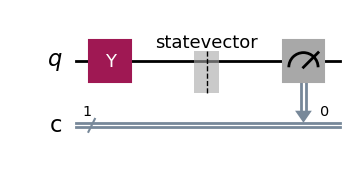

In [443]:
qc_y = QuantumCircuit(1,1)
qc_y.y(0)
qc_y.save_statevector()
qc_y.measure(0,0)
qc_y.draw('mpl')

In [444]:
backend = Aer.get_backend('aer_simulator')

#transpile and run
compiled_y = transpile(qc_y,backend)
result_y = backend.run(compiled_y,shots=1024).result()

#get classical counts
counts_y = result_y.get_counts()
print(counts_y)

{'1': 1024}


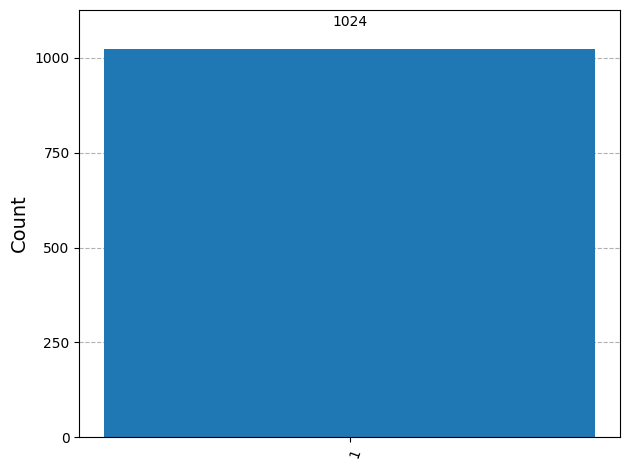

In [445]:
plot_histogram(counts_y)

In [446]:
result_y = backend.run(qc_y).result()
print("Statevector:", result_y.get_statevector())

Statevector: Statevector([0.-0.j, 0.+1.j],
            dims=(2,))


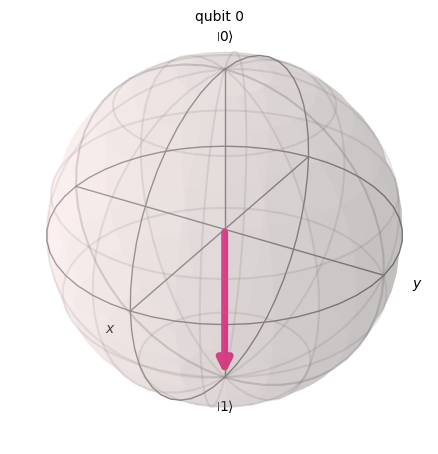

In [447]:
plot_bloch_multivector(result_y.get_statevector())

In [448]:
qc_y = QuantumCircuit(1)
qc_y.y(0)
print("Y matrix:\n", Operator(qc_y).data)

Y matrix:
 [[0.+0.j 0.-1.j]
 [0.+1.j 0.+0.j]]


# Pauli Z-Gate

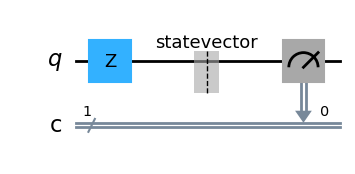

In [449]:
qc_z = QuantumCircuit(1,1)
qc_z.z(0)
qc_z.save_statevector()
qc_z.measure(0,0)
qc_z.draw('mpl')

In [450]:
#transpile and run
compiled_z = transpile(qc_z,backend)
result_z = backend.run(compiled_z,shots=1024).result()

#get classical counts
counts_z = result_z.get_counts()
print(counts_z)

{'0': 1024}


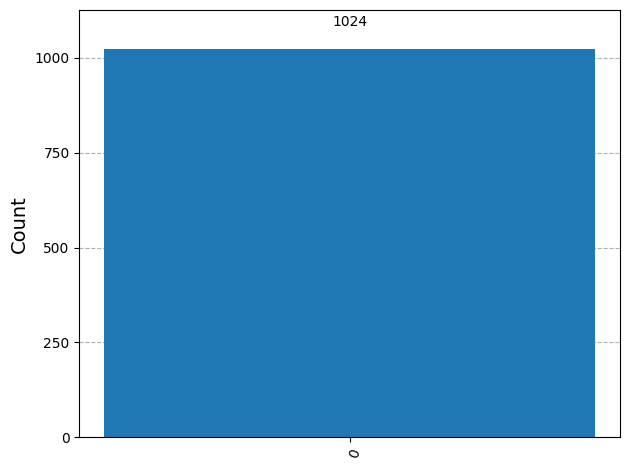

In [451]:
plot_histogram(counts_z)

In [452]:
result_z = backend.run(qc_z).result()
print("Statevector:", result_z.get_statevector())

Statevector: Statevector([ 1.+0.j, -0.+0.j],
            dims=(2,))


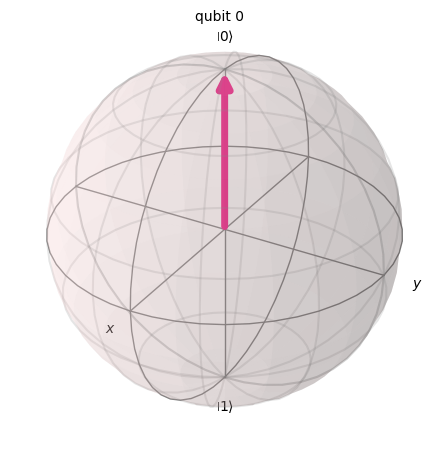

In [453]:
plot_bloch_multivector(result_z.get_statevector())

In [454]:
qc_z = QuantumCircuit(1)
qc_z.z(0)
print("Z matrix:\n", Operator(qc_z).data)

Z matrix:
 [[ 1.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j]]


In [455]:
#Little exercise
xz_qc = QuantumCircuit(1,1)
xz_qc.x(0)
xz_qc.z(0)

In [456]:
svi = Statevector.from_label('0')

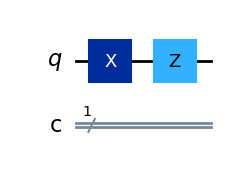

In [457]:
xz_qc.draw('mpl')

In [458]:
print("XZ matrix:\n", Operator(xz_qc).data)

XZ matrix:
 [[ 0.+0.j  1.+0.j]
 [-1.+0.j  0.+0.j]]


In [459]:
sv_xz = svi.evolve(xz_qc)

In [460]:
print("XZ|0> =", sv_xz.data)

XZ|0> = [ 0.+0.j -1.+0.j]


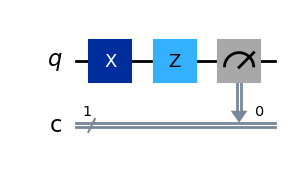

In [461]:
#Measured output
xz_qc.measure(0,0)
xz_qc.draw('mpl')


In [462]:
compiled_xz = transpile(xz_qc,backend)
result_xz = backend.run(compiled_xz,shots=1024).result()

counts_xz = result_xz.get_counts()
print(counts_xz)

{'1': 1024}


In [463]:
zx_qc = QuantumCircuit(1,1)
zx_qc.z(0)
zx_qc.x(0)

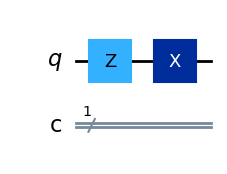

In [464]:
zx_qc.draw('mpl')

In [465]:
print("ZX matrix:\n", Operator(zx_qc).data)

ZX matrix:
 [[ 0.+0.j -1.+0.j]
 [ 1.+0.j  0.+0.j]]


In [466]:
sv_zx = svi.evolve(zx_qc)

In [467]:
print("ZX|0> =", sv_zx.data)

ZX|0> = [0.+0.j 1.+0.j]


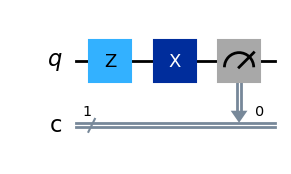

In [468]:
#Measured output
zx_qc.measure(0,0)
zx_qc.draw('mpl')

In [469]:
compiled_zx = transpile(zx_qc,backend)
result_zx = backend.run(compiled_zx,shots=1024).result()

counts_zx = result_zx.get_counts()
print(counts_zx)

{'1': 1024}


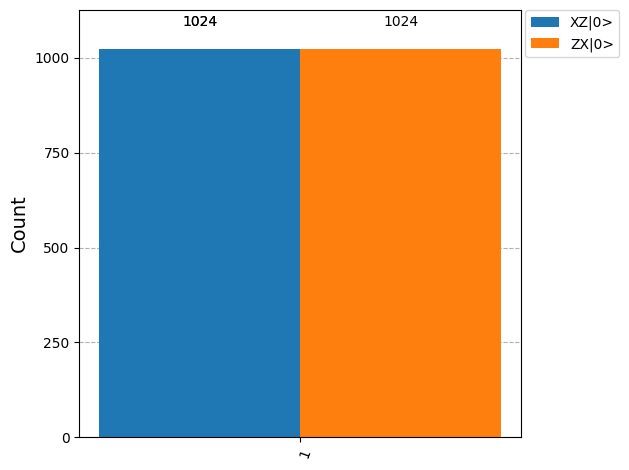

In [470]:
plot_histogram([counts_xz, counts_zx], legend=['XZ|0>', 'ZX|0>'])

# Hadamard Gate

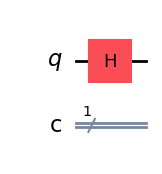

In [471]:
qc_h = QuantumCircuit(1,1)
qc_h.h(0)
qc_h.draw('mpl')

In [472]:
svh = Statevector.from_instruction(qc_h)
print(svh)

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


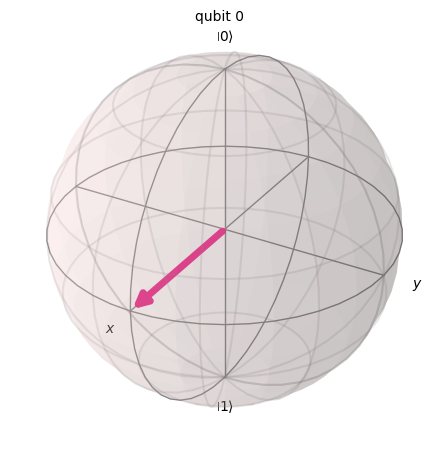

In [473]:
plot_bloch_multivector(svh)

In [474]:
Operator(qc_h).data

array([[ 0.70710678+0.j,  0.70710678+0.j],
       [ 0.70710678+0.j, -0.70710678+0.j]])

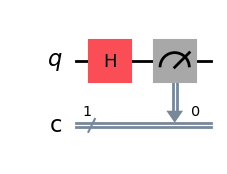

In [475]:
qc_h.measure(0,0)
qc_h.draw('mpl')

In [476]:
compiled_h = transpile(qc_h,backend)
result_h = backend.run(compiled_h,shots=1024).result()

counts_h = result_h.get_counts()
print(counts_h)

{'0': 539, '1': 485}


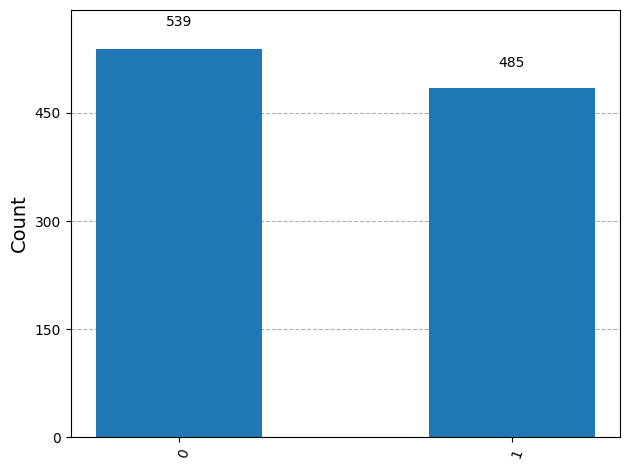

In [477]:
plot_histogram(counts_h)

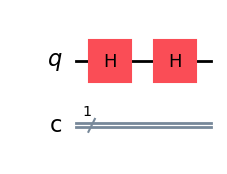

In [478]:
qc_hh = QuantumCircuit(1,1)
qc_hh.h(0)
qc_hh.h(0)
qc_hh.draw('mpl')

In [479]:
svhh = Statevector.from_instruction(qc_hh)
print(svhh)

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


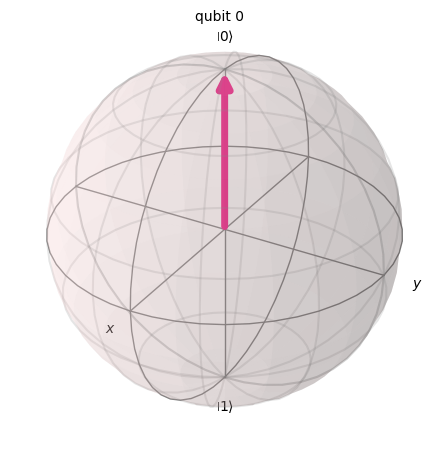

In [480]:
plot_bloch_multivector(svhh)

In [481]:
Operator(qc_hh).data

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j]])

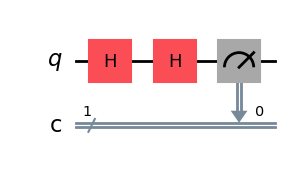

In [482]:
qc_hh.measure(0,0)
qc_hh.draw('mpl')

In [483]:
compiled_hh = transpile(qc_hh,backend)
result_hh = backend.run(compiled_hh,shots=1024).result()

counts_hh = result_hh.get_counts()
print(counts_hh)

{'0': 1024}


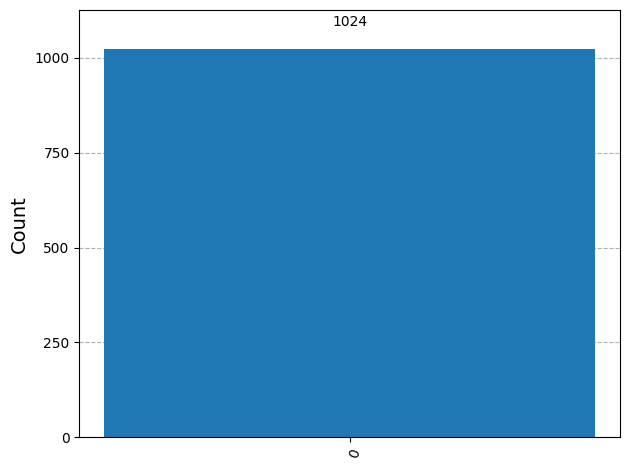

In [484]:
plot_histogram(counts_hh)